# Statistical Thinking in Python (Part 2)

## Chapter 5

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from utils import ecdf, pearson_r, diff_of_means, permutation_sample, draw_perm_reps, draw_bs_reps, draw_bs_pairs_linreg

# Seed random number generator
np.random.seed(42)

In [19]:
df_1975 = pd.read_csv("finch_beaks_1975.csv")
df_1975["year"] = 1975

df_1975

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.40,8.00,1975
1,9,fortis,9.20,8.30,1975
2,12,fortis,9.50,7.50,1975
3,15,fortis,9.50,8.00,1975
4,305,fortis,11.50,9.90,1975
...,...,...,...,...,...
398,20225,scandens,14.55,9.45,1975
399,20252,scandens,14.05,9.05,1975
400,20255,scandens,14.45,8.75,1975
401,20266,scandens,15.05,9.45,1975


In [20]:
df_2012 = pd.read_csv("finch_beaks_2012.csv")
df_2012["year"] = 2012
df_2012.rename(
    columns={
        "blength": "Beak length, mm",
        "bdepth": "Beak depth, mm"
    },
    inplace=True
)

df_2012

,band,species,"Beak length, mm","Beak depth, mm",year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012
...,...,...,...,...,...
243,21295,scandens,14.2,9.3,2012
244,21297,scandens,13.0,9.8,2012
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012


In [21]:
df_all = pd.concat([df_1975, df_2012])
df_all

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975
...,...,...,...,...,...
243,21295,scandens,14.2,9.3,2012
244,21297,scandens,13.0,9.8,2012
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012


In [50]:
df_all["species"].unique()

array(['fortis', 'scandens'], dtype=object)

In [22]:
df = df_all[df_all["species"]=="scandens"].copy()
df = df.reset_index(drop=True)
df.columns = ["band", "species", "beak_length", "beak_depth", "year"]

df

,band,species,beak_length,beak_depth,year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975
...,...,...,...,...,...
209,21295,scandens,14.2,9.3,2012
210,21297,scandens,13.0,9.8,2012
211,21340,scandens,14.6,8.9,2012
212,21342,scandens,13.1,9.8,2012


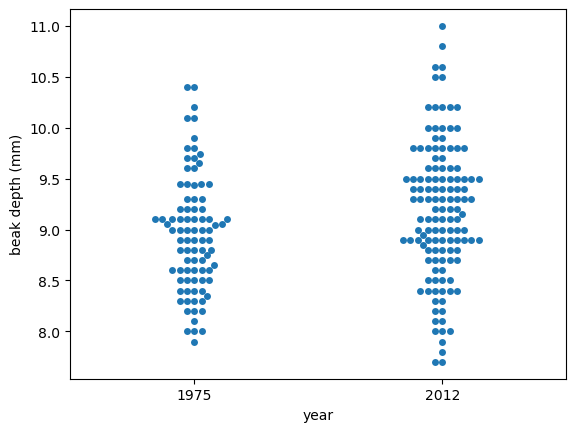

In [23]:
# Create bee swarm plot
_ = sns.swarmplot(x="year", y="beak_depth", data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot

plt.show()

In [38]:
bd_1975 = df[df["year"]==1975]["beak_depth"].to_numpy()
bd_2012 = df[df["year"]==2012]["beak_depth"].to_numpy()

bl_1975 = df[df["year"]==1975]["beak_length"].to_numpy()
bl_2012 = df[df["year"]==2012]["beak_length"].to_numpy()

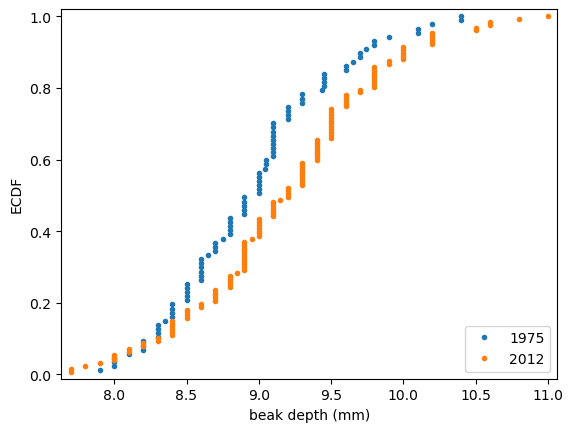

In [39]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [40]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06022194 0.3927617 ] mm


In [41]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0029


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

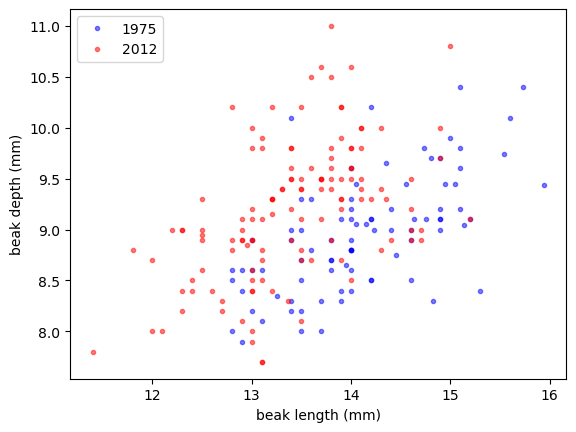

In [42]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='None', color="blue", alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='None', color="red", alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

Beaks became deeper and shorter

In [43]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.3289707  0.57828795]
1975: intercept = 2.3908752365842263 conf int = [0.77137514 4.34143162]
2012: slope = 0.462630358835313 conf int = [0.32777066 0.60329528]
2012: intercept = 2.9772474982360198 conf int = [1.16438275 4.7745307 ]


Similar slopes but intercepts are slightly different

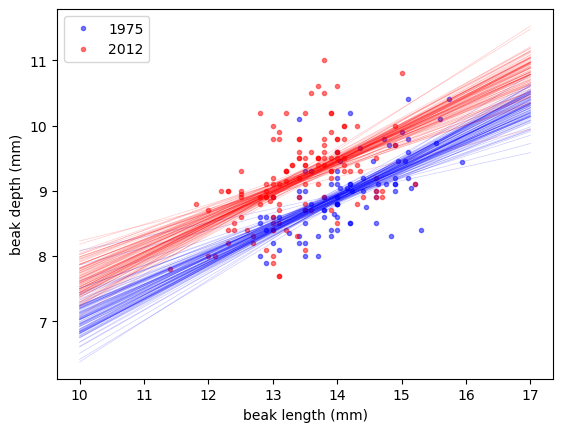

In [44]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color="blue")
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color="red")

# Draw the plot again
plt.show()

In [45]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55717638 1.60135719]
2012: mean ratio = 1.4658342276847767 conf int = [1.44402996 1.48745153]


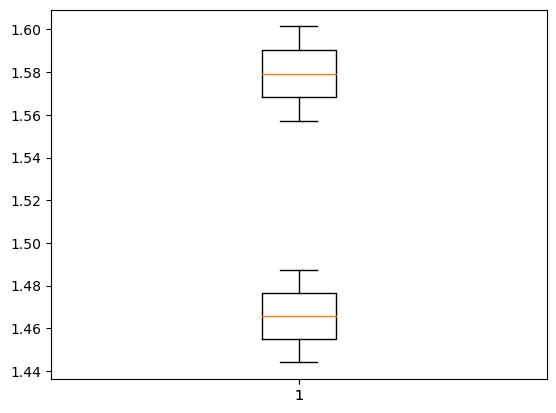

In [47]:
_ = plt.boxplot(conf_int_1975)
_ = plt.boxplot(conf_int_2012)
plt.show()

In [52]:
df_scandens_heredity = pd.read_csv("scandens_beak_depth_heredity.csv")
df_scandens_heredity

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215
...,...,...
125,9.6516,9.4899
126,9.7572,9.5962
127,9.8854,9.6873
128,10.0023,9.5203


In [53]:
bd_parent_scandens = df_scandens_heredity["mid_parent"].to_numpy()
bd_offspring_scandens = df_scandens_heredity["mid_offspring"].to_numpy()

In [55]:
df_fortis_heredity = pd.read_csv("fortis_beak_depth_heredity.csv")
df_fortis_heredity["parent"] = (df_fortis_heredity["Male BD"] + df_fortis_heredity["Female BD"])/2
df_fortis_heredity

,Mid-offspr,Male BD,Female BD,parent
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125
...,...,...,...,...
408,7.70,7.40,9.0,8.200
409,7.90,7.40,8.3,7.850
410,9.50,8.85,8.7,8.775
411,8.20,9.30,7.7,8.500


In [57]:
bd_parent_fortis = df_fortis_heredity["parent"].to_numpy()
bd_offspring_fortis = df_fortis_heredity["Mid-offspr"].to_numpy()

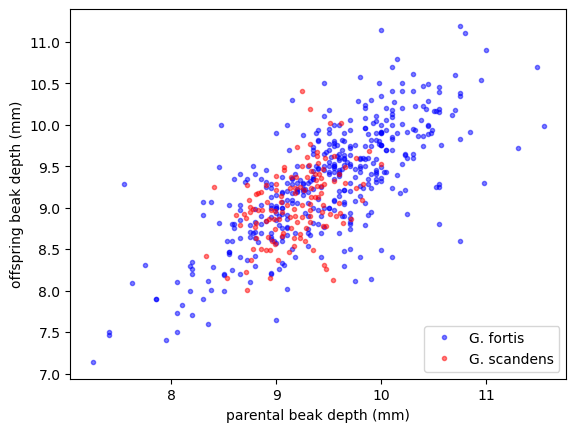

In [58]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle="none", color="blue", alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle="none", color="red", alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

In [59]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [60]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.26391906 0.54443846]
G. fortis: 0.7283412395518487 [0.67052508 0.77849215]


The confidence intervals show that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

In [61]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.35503563 0.75765409]
G. fortis: 0.7229051911438156 [0.6435379  0.79852755]


G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

In [62]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


The p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.